### WhiteNoise-Core Stochastic Evaluation

WhiteNoise-Core has implemented latest research in the space of differential privacy to provide commonly used aggregates like mean, variance, moment, covariance and also come up with ways to solve the issue of bias in reporting these differentially private aggregates. This notebook uses the stochastic evaluator to see if the new algorithms pass the privacy and bias tests. 

### Loading the library

In [1]:
import pandas as pd
import dp_verification as dp
import aggregation as agg
import warnings
import os
import sys
sys.path.insert(0, os.path.join(os.path.abspath(''), '../../../../../whitenoise-core-python/'))
import opendp.whitenoise.core as wn
warnings.filterwarnings('ignore')

In [2]:
dv = dp.DPVerification(dataset_size=10000)
ag = agg.Aggregation(t=1, repeat_count=10000)

Loaded 10000 records


### Loading the PUMS dataset

In [3]:
# Yarrow Test
pums_1000_dataset_path = os.path.join(os.path.abspath(''), '../../../../service', "datasets", "evaluation", "PUMS_1000.csv")
test_csv_path = pums_1000_dataset_path
test_csv_names = ["age", "sex", "educ", "race", "income", "married"]

df = pd.read_csv(test_csv_path)
actual_mean = df['race'].mean()
actual_var = df['educ'].var()
actual_moment = df['race'].skew()
actual_covariance = df['educ'].cov(df['income'])


### MEAN

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  0.026832037352356102
p-Value of 1 sample t-test:  0.27365361099124824
Bias Test: True 



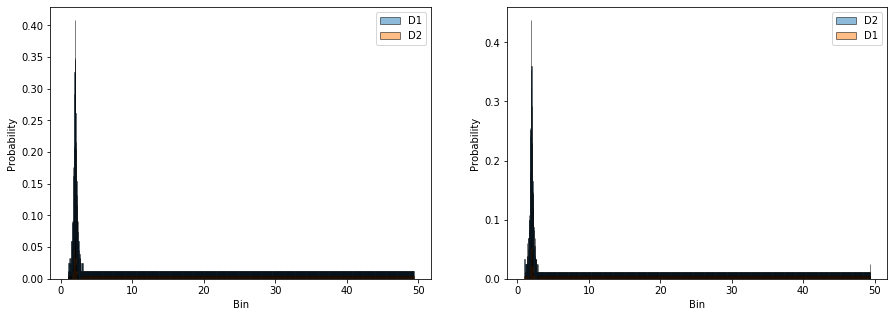

In [4]:
dp_mean_res, bias_mean_res = dv.whitenoise_core_test(test_csv_path, 
                                                       test_csv_names, 
                                                       wn.dp_mean, 
                                                       'race', 
                                                       epsilon=.65, 
                                                       actual = actual_mean, 
                                                       data_lower=0., 
                                                       data_upper=100., 
                                                       data_n=1000)

### VARIANCE

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  -0.23274320637193946
p-Value of 1 sample t-test:  0.0
Bias Test: False 



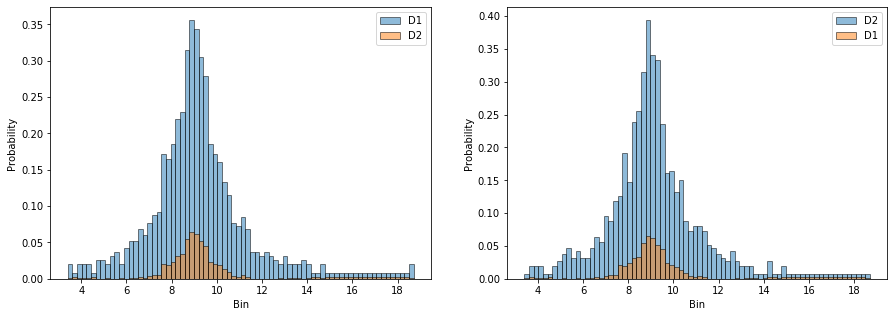

In [5]:
dp_var_res, bias_var_res = dv.whitenoise_core_test(test_csv_path, 
                                                     test_csv_names, 
                                                     wn.dp_variance, 
                                                     'educ', 
                                                     epsilon=.15, 
                                                     actual = actual_var, 
                                                     data_lower=0., 
                                                     data_upper=12., 
                                                     data_n=1000)

### MOMENT

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  -64.94891450682142
p-Value of 1 sample t-test:  0.880468647948085
Bias Test: True 



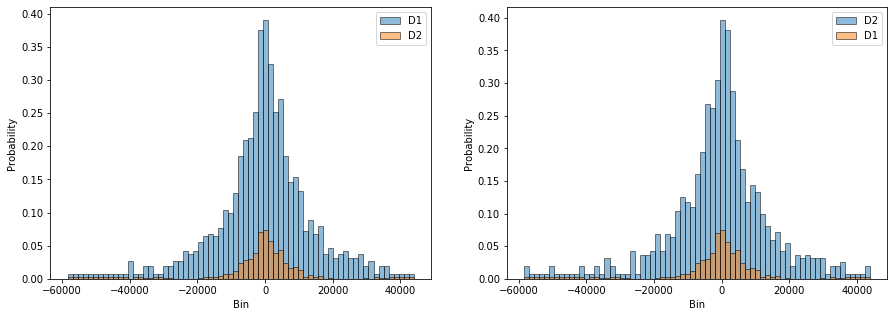

In [6]:
dp_moment_res, bias_moment_res = dv.whitenoise_core_test(test_csv_path, 
                                                           test_csv_names, 
                                                           wn.dp_moment_raw, 
                                                           'race', 
                                                           epsilon=.15, 
                                                           actual = actual_moment, 
                                                           data_lower=0., 
                                                           data_upper=100., 
                                                           data_n=1000, 
                                                           order = 3)

### COVARIANCE

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  -1.0000000045805888
p-Value of 1 sample t-test:  0.0
Bias Test: False 



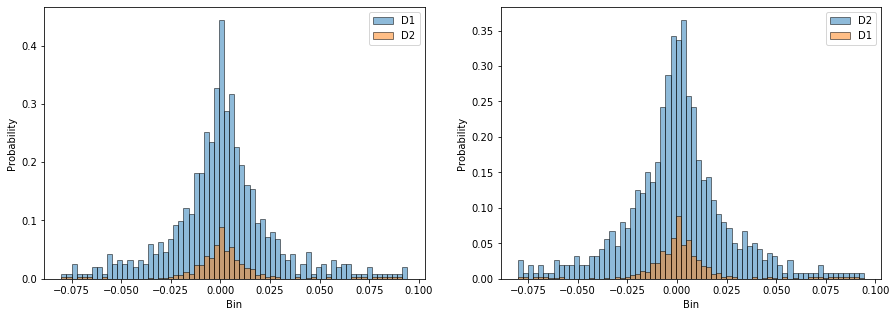

In [7]:
dp_covariance_res, bias_cov_res = dv.whitenoise_core_test(test_csv_path, 
                                                            test_csv_names, 
                                                            wn.dp_covariance, 
                                                            'age', 
                                                            'married', 
                                                            actual = actual_covariance, 
                                                            epsilon=.5, 
                                                            data_n=1000,
                                                            data_lower=[0., 0.],
                                                            data_upper=[1., 1.]
                                                           )